   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

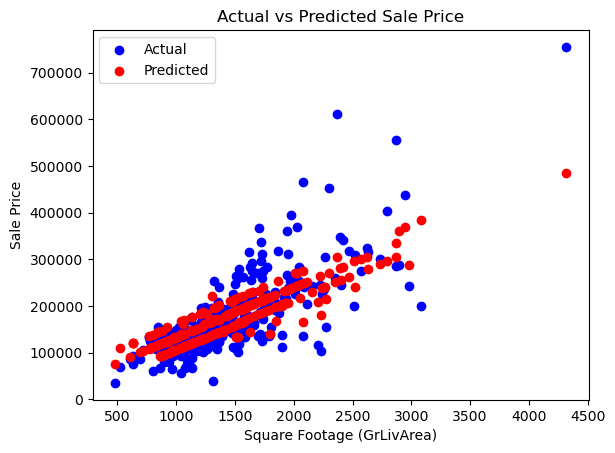

In [4]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the datasets
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

# Display the first few rows of the training dataset
print(train_data.head())

# Select relevant features and target variable
features = ['GrLivArea', 'BedroomAbvGr', 'FullBath']  # Using 'GrLivArea' for square footage, 'BedroomAbvGr', and 'FullBath'
target = 'SalePrice'

# Check for missing values in the training data
print(train_data[features + [target]].isnull().sum())

# Handle missing values by dropping rows with missing values in this case
train_data = train_data.dropna(subset=features + [target])

# Split the data into training and testing sets
X = train_data[features]
y = train_data[target]

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred_train = model.predict(X_train)
y_pred_valid = model.predict(X_valid)

# Evaluate the model
train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
valid_rmse = np.sqrt(mean_squared_error(y_valid, y_pred_valid))
r2 = r2_score(y_valid, y_pred_valid)

print(f'Training RMSE: {train_rmse}')
print(f'Validation RMSE: {valid_rmse}')
print(f'R2 Score: {r2}')
print(f'Accuracy (R² Score): {r2 * 100:.2f}%')

# Make predictions on the test dataset
test_predictions = model.predict(test_data[features])

# Save the predictions to a CSV file
output = pd.DataFrame({'Id': test_data['Id'], 'SalePrice': test_predictions})
output.to_csv('house_prices_predictions.csv', index=False)

# Plotting the results
plt.scatter(X_valid['GrLivArea'], y_valid, color='blue', label='Actual')
plt.scatter(X_valid['GrLivArea'], y_pred_valid, color='red', label='Predicted')
plt.xlabel('Square Footage (GrLivArea)')
plt.ylabel('Sale Price')
plt.title('Actual vs Predicted Sale Price')
plt.legend()
plt.show()
